In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris=sns.load_dataset('iris')
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
38,4.4,3.0,1.3,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
104,6.5,3.0,5.8,2.2,virginica
92,5.8,2.6,4.0,1.2,versicolor
25,5.0,3.0,1.6,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### EDA

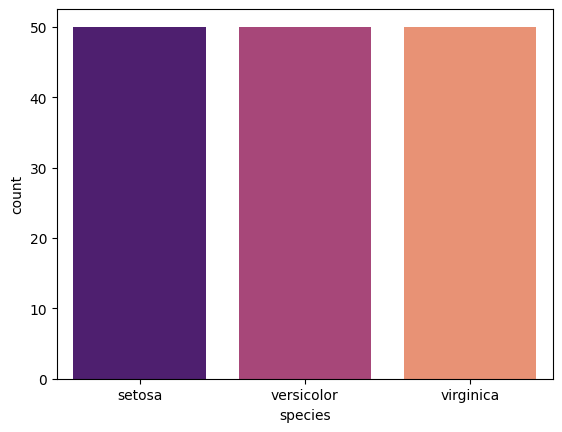

In [4]:
sns.countplot(x='species',data=iris,palette='magma')
plt.show()

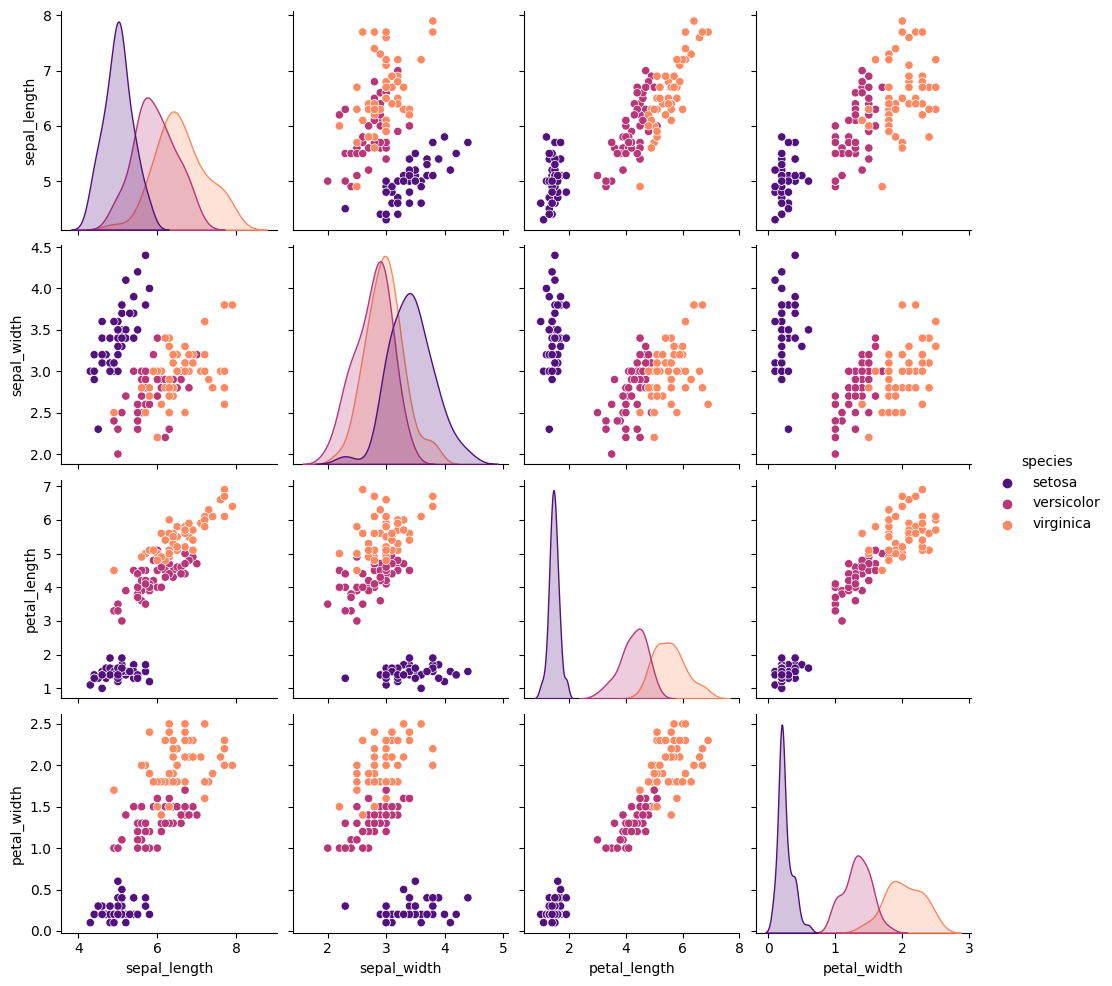

In [5]:
sns.pairplot(iris,hue='species',palette='magma')
plt.show()

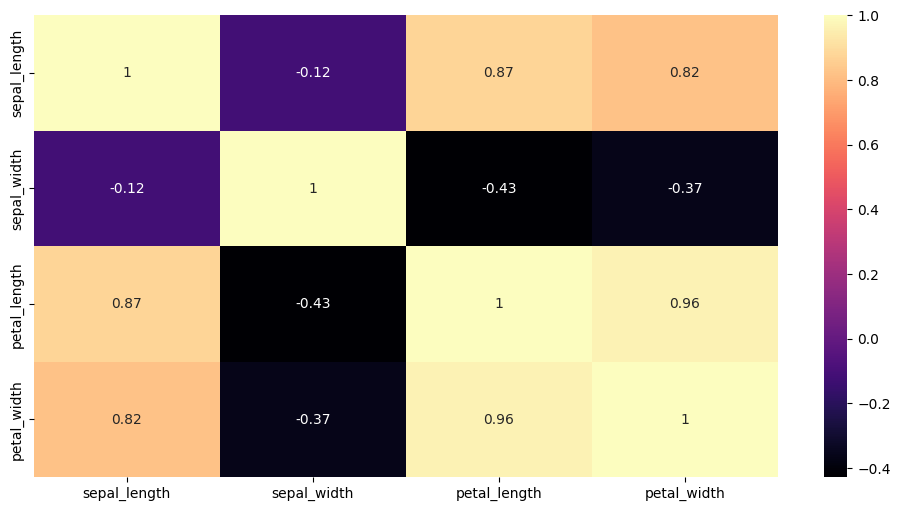

In [6]:
plt.figure(figsize=(12,6))
correlation=iris.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, annot=True, cmap='magma')
plt.show()

### 
**Applying LABEL ENCODER**

In [7]:
# Target Column
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
# Target column is Categorical, converting it to numeric by proving labels
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y=le.fit_transform(iris['species'])


In [9]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
# Dependent feature
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# Independent features
X=iris.iloc[:,:-1]

In [12]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## 
**Train Test Split**

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=19)

## Model Building

### Decision Tree Implementation

In [14]:
from sklearn.tree import DecisionTreeClassifier

## PostPruning

In [15]:
dt=DecisionTreeClassifier()

In [16]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

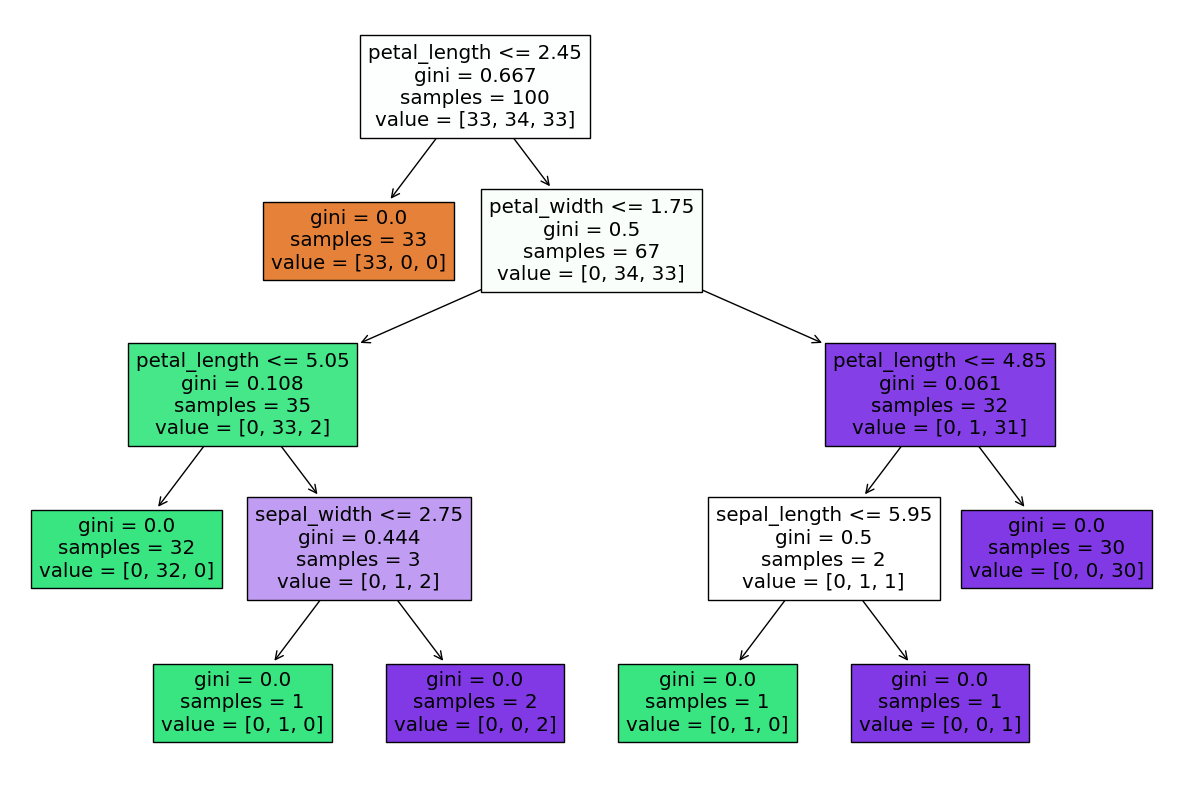

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dt,filled=True,feature_names=X.columns)
plt.show()

In [18]:
dt_1=DecisionTreeClassifier(max_depth=2)

In [19]:
dt_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [20]:
dt_1.feature_importances_

array([0.        , 0.        , 0.54416538, 0.45583462])

In [21]:
pd.DataFrame(index=X.columns,data=dt_1.feature_importances_,columns=['Feature Importance'])

,Feature Importance
sepal_length,0.000000
sepal_width,0.000000
petal_length,0.544165
petal_width,0.455835


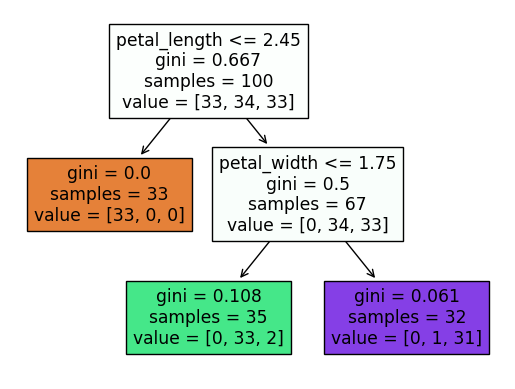

In [22]:
plot_tree(dt_1,filled=True,feature_names=X.columns)
plt.show()

##
**Prediction**

In [23]:
y_pred=dt_1.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2, 2, 0, 2, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [25]:
accuracy_score(y_pred,y_test)

0.94

In [26]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[17,  0,  0],
       [ 0, 16,  0],
       [ 0,  3, 14]], dtype=int64)

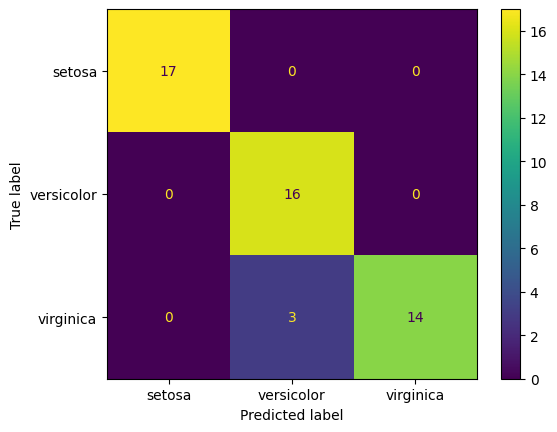

In [27]:
dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_)
dis.plot()

In [28]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.84      0.91        19
           2       0.82      1.00      0.90        14

    accuracy                           0.94        50
   macro avg       0.94      0.95      0.94        50
weighted avg       0.95      0.94      0.94        50



## PrePruning

In [29]:
parameter={
                       'criterion':['gini','entropy','log_loss'],
                        'splitter':['best','random'],
                        'max_depth':[2,3,4,5],
                        'max_features':['auto','sqrt','log2'],
                        'min_samples_split':[2,3,4,5,6]
    
                     }

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
dt=DecisionTreeClassifier()
gs=GridSearchCV(dt,param_grid=parameter,cv=5,scoring='accuracy')

In [32]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [33]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_split': 6,
 'splitter': 'random'}

In [34]:
gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=6, splitter='random')

In [35]:
gs.best_score_

0.9700000000000001

##
**Prediction**

In [36]:
y_pred1=gs.predict(X_test)
y_pred1

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2,
       2, 1, 0, 2, 0, 0])

In [37]:
accuracy_score(y_pred1,y_test)

0.82

In [38]:
cm1=confusion_matrix(y_test,y_pred1)
cm1

array([[16,  1,  0],
       [ 0, 16,  0],
       [ 0,  8,  9]], dtype=int64)

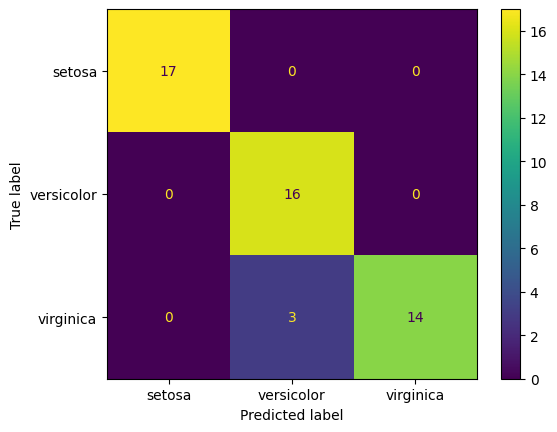

In [39]:
dis1=ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=le.classes_)
dis.plot()

In [40]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.64      0.78        25
           2       0.53      1.00      0.69         9

    accuracy                           0.82        50
   macro avg       0.82      0.88      0.81        50
weighted avg       0.90      0.82      0.83        50

